# Moore’s law

Use the scripts from: https://github.com/preshing/analyze-spec-benchmarks to download a large amount of data relating to CPU specs. The script might take as long as an hour, depending on your connection speed.

This will save the data in the following format:

testID,benchName,base,peak\ cpu95-19990104-03254,101.tomcatv,19.4,27.1\ cpu95-19990104-03254,102.swim,27.2,34.8\ cpu95-19990104-03254,103.su2cor,10.1,9.98\ cpu95-19990104-03254,104.hydro2d,8.58,8.61

Now do the following:

1)Extract the date and base speed for a benchmark of your choice

2)Plot the data in a semi-log plot

3)Now train a linear model to fit your plot.

4)How well is Moore’s law holding up?

*Nikesh helped me to troubleshoot the errors I had with the code I did for the pre-class work.

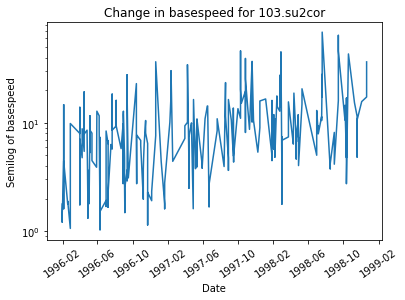

Coefficients: 
 [[1.4073043e-07]]
Mean squared error: 95.47
Variance score: 0.13


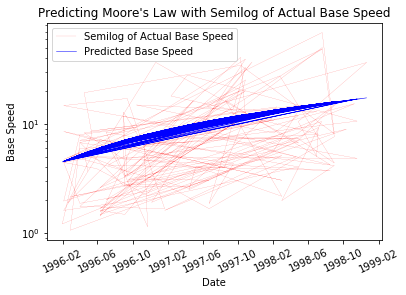

In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

benchmarks = pd.read_csv('benchmarks.txt', sep=',', low_memory=False)

#Extracting the date and base speed for 103.su2cor

def getDate(testID):
    arr = testID.split('-')
    if len(arr) >= 2:
        date = arr[1]
        if len(date) == 6:
            return datetime.strptime(date, '%y%m%d')
    return np.nan

benchmarks_new= benchmarks[benchmarks.benchName == '103.su2cor']
data = data.assign(date = benchmarks_new.testID.apply(getDate))
data = data.dropna()

# Plot the data in a semi-log plot

plt.semilogy(data.date,data.base)
plt.xlabel('Date')
plt.ylabel('Semilog of basespeed')
plt.title('Change in basespeed for 103.su2cor')
plt.xticks(rotation=35)
plt.show()


#Creating the linear model

date_train, date_test, base_train, base_test = train_test_split(data.date.values.reshape(-1,1),
                                                  data.base.values.reshape(-1,1),
                                                  test_size=0.4)


def changeToTimestamp(npDate):
    return npDate.astype('datetime64[s]').astype('float') #This converts the date to seconds

date_train_timestamp = list(map(changeToTimestamp, date_train))
date_test_timestamp = list(map(changeToTimestamp, date_test))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(date_train_timestamp, base_train)

# Make predictions using the testing set
base_pred = regr.predict(date_test_timestamp)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(base_test, base_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(base_test, base_pred))

# Plot outputs

#Using semilog of base speed
plt.semilogy(date_test, base_test, color='red',linewidth=0.1, label='Semilog of Actual Base Speed')
plt.plot(date_test, base_pred, color='blue', linewidth=0.5, label='Predicted Base Speed')
plt.xlabel('Date')
plt.ylabel('Base Speed')
plt.title("Predicting Moore's Law with Semilog of Actual Base Speed")
plt.xticks(rotation=25)
plt.legend()
plt.show()

Does Moore's law hold?

According to Moore's law, we expect that base speed would double every two years, which is an exponential growth. When we plot with the semilog of the base speed, we see a linear prediction. Although our predicted base speed is linear, it still shows that the base speed would increase as the the years go by. So, I would say that Moore's law partly holds because base speed is predicted to increase as the years go by, but it is not exponential.

# MNIST Digits

No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwritten digits (0-9).

1)Using Scikit.learn, load the MNIST digits (See here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

2)Plot some of the examples.

3)Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.

4)Report your error rates on a held out part of the data.



<Figure size 432x288 with 0 Axes>

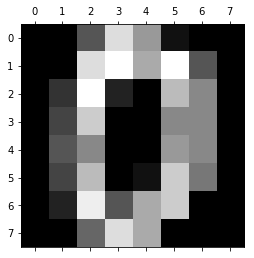

<Figure size 432x288 with 0 Axes>

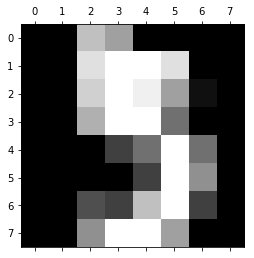

NameError: name 'knn' is not defined

In [2]:
#Loading Data

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

digits = load_digits()

#Choosing Digit Classes 3 and 8
#Nicole helped me figure out how to select two digit classes from the dataset

data= np.concatenate((digits.data[np.where(digits.target == 8)], digits.data[np.where(digits.target == 3)]))
target = np.concatenate((digits.target[np.where(digits.target == 8)], digits.target[np.where(digits.target == 3)]))


#Examples
#0
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

#5
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[5])
plt.show() 


# Training a k-nearest neighbor classifier

# Splitting the dataset into the Training set and Test set

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

#Fitting the classifier
neigh = KNeighborsClassifier(n_neighbors=1) 
#I decided to use 1 as the n_neighbours because when I increased it multiple times when writing this code, the error rate was still the same.
neigh.fit(data, target) 

#Making predictions
target_pred = knn.predict(data_test)


#Error rate

error_rate_method1= 1-accuracy_score(target_test, target_pred) #same answer as using knn.score
#error_rate_method2= 1- knn.score(data_test, target_test)

print('Error rate with method 1 is:',error_rate_method1)
#print('Error rate with method 2 is:',error_rate_method2)